# PREDICTING PRICE OF PRE-OWNED CARS

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [9]:
# Setting dimensions for plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [10]:
# Load csv file into DataFrame
cars_data = pd.read_csv(r'C:\Users\Sharan Babu\Desktop\Github\cars_sampled.csv')

In [11]:
# Check shape of DataFrame
cars_data.shape

(50001, 19)

In [12]:
# Creating a Copy
cars = cars_data.copy()

In [13]:
# Summary of the Dataframe
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

In [16]:
# Descriptive statistics of numerical features of the data set
pd.set_option('display.float_format',lambda x: '%.3f' % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [17]:
#To display maximum set of columns
pd.set_option('display.max_columns',500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [18]:
# Dropping unwanted columns
col= ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=col, axis=1)

In [19]:
# Removing duplicate records
cars.drop_duplicates(keep='first',inplace=True)
#470 records dropped

In [20]:
# DATA CLEANING
# No.of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

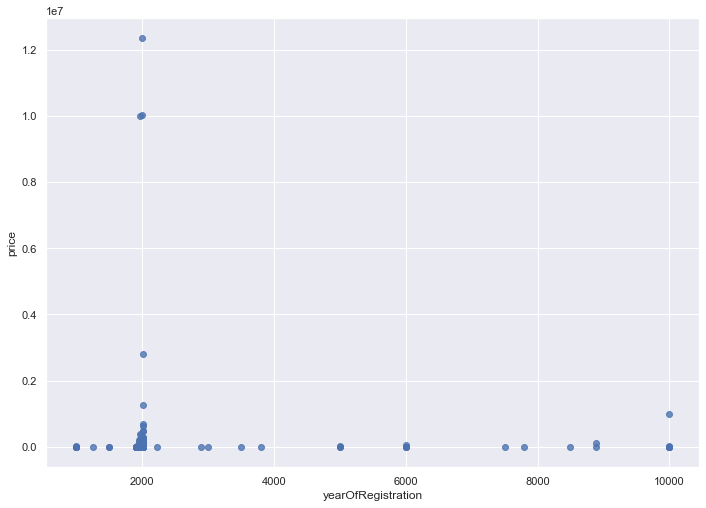

In [23]:
# Variable yearOfRegistration
yearwise_count= cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration'] > 2018)
sum(cars['yearOfRegistration'] < 1950)
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False, data=cars)
#working range -- 1950 and 2018

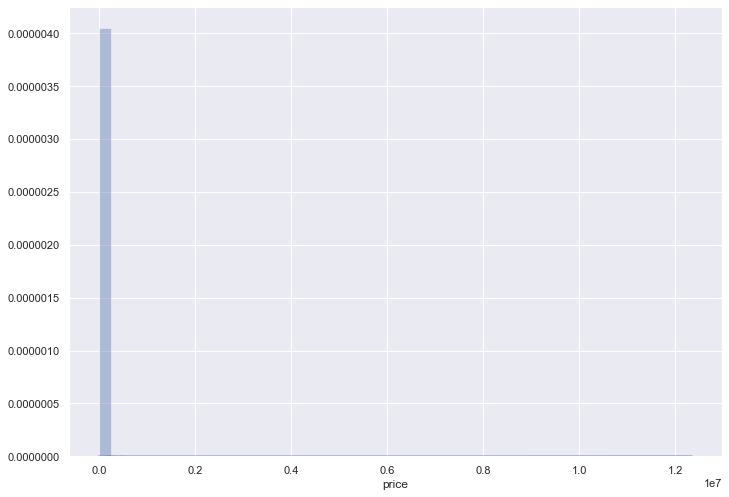

In [25]:
# Variable Price
price_count = cars['price'].value_counts().sort_index()
sns.distplot(cars['price'])


In [26]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

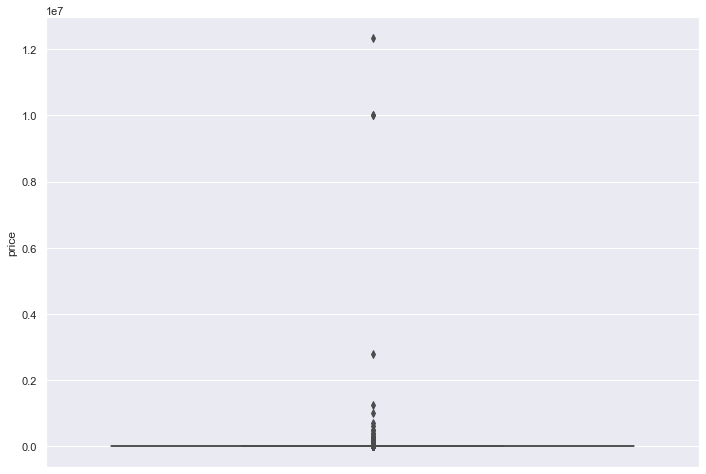

In [27]:
sns.boxplot(y=cars['price'])

In [28]:
sum(cars['price']>150000)

34

In [30]:
sum(cars['price']<100)
#Working range - 100 and 150000

1748

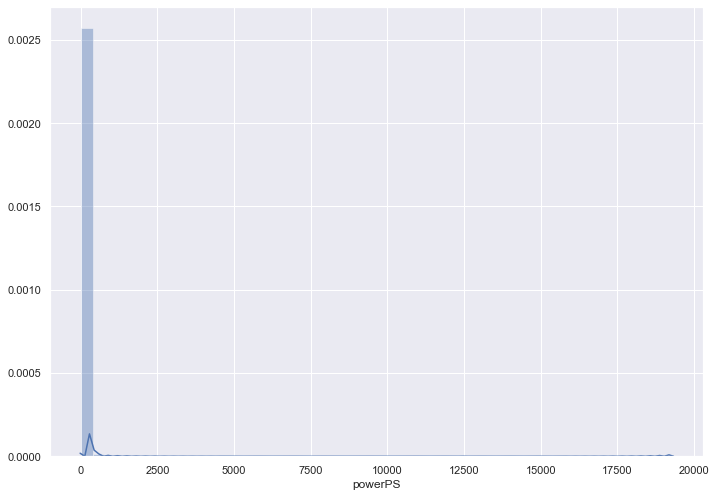

In [32]:
# Variable powerPs
power_count = cars['powerPS'].value_counts().sort_index()
sns.distplot(cars['powerPS'])

In [33]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

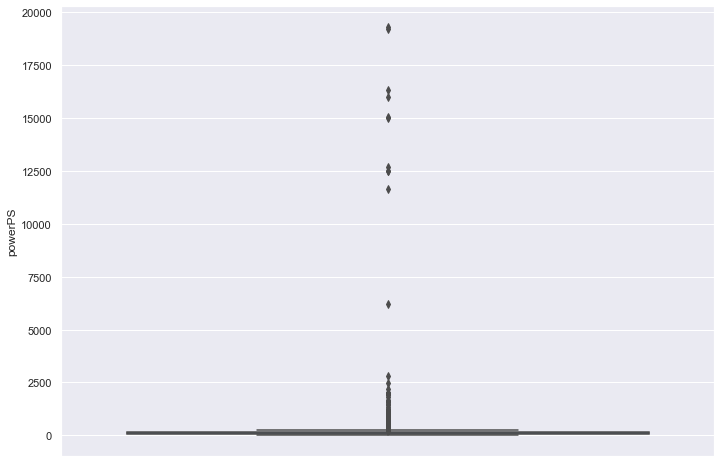

In [34]:
sns.boxplot(y=cars['powerPS'])

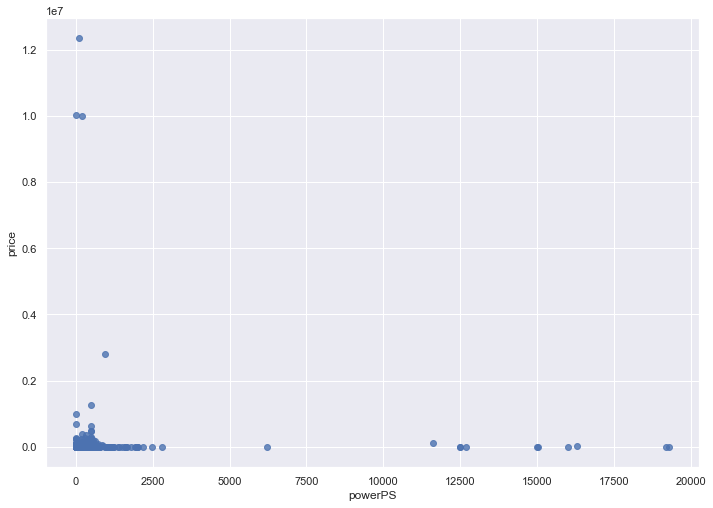

In [35]:
sns.regplot(x='powerPS', y='price', scatter = True, fit_reg=False, data=cars)

In [37]:
sum(cars['powerPS'] > 500)

115

In [38]:
sum(cars['powerPS'] < 10)
# WORKING RANGE 10-500

5565

# Working range of data

In [39]:
cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]
# ~6700 records are dropped.

In [41]:
# Further to simplify - variable reduction
# Combining yearOfRegistration and monthOfRegistration
cars['monthOfRegistration']/=12

C:\Users\Sharan Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
# Creating a new variable Age by adding yearOfRegistration and monthofRegistration
cars['Age'] = (2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

C:\Users\Sharan Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sharan Babu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [44]:
# Dropping yearOfRegistation and monthOfRegistration
cars = cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

# VISUALIZING PARAMETERS

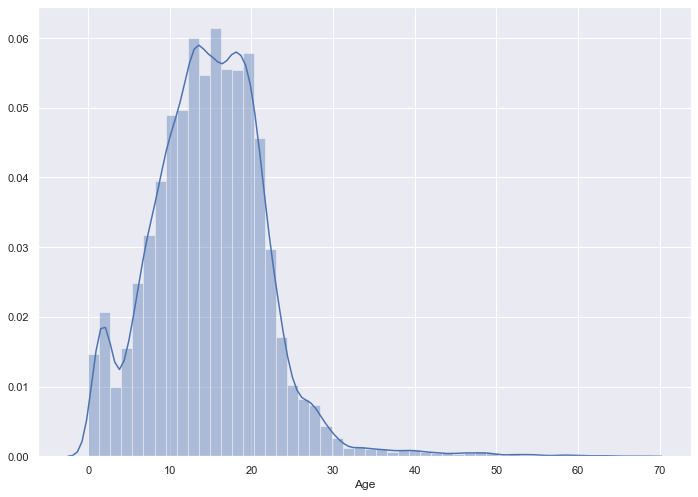

In [45]:
#Age
sns.distplot(cars['Age'])

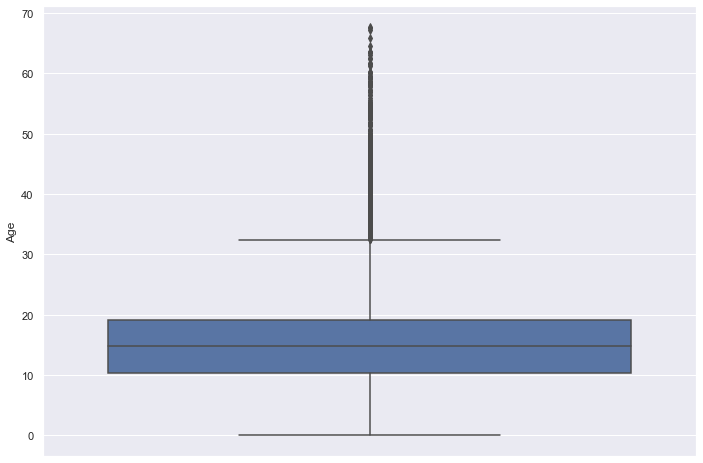

In [46]:
sns.boxplot(y=cars['Age'])

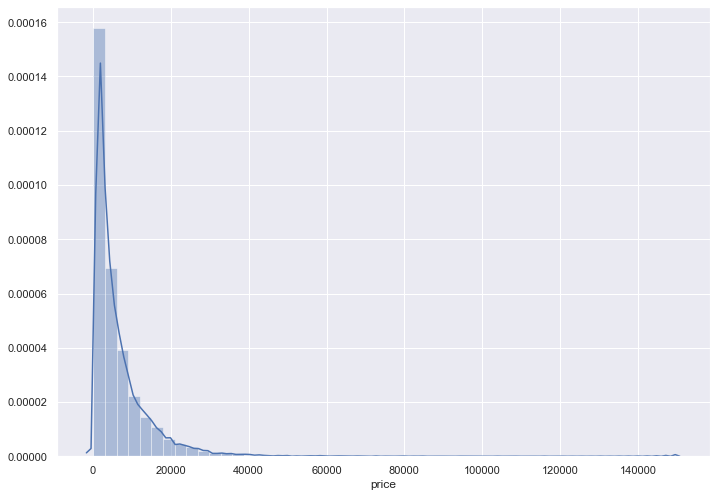

In [47]:
#price
sns.distplot(cars['price'])

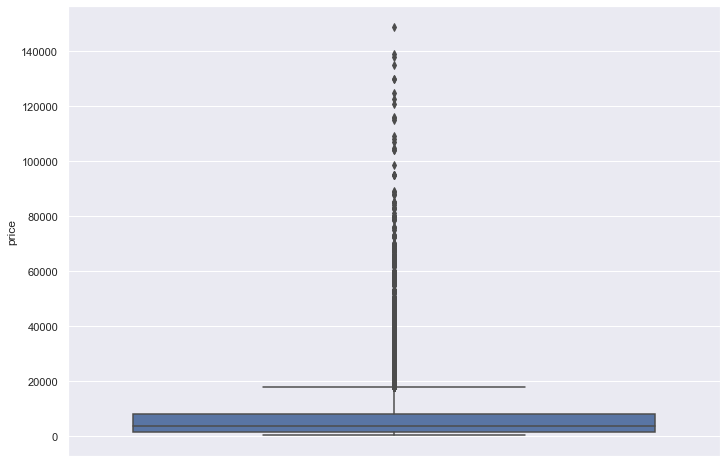

In [48]:
sns.boxplot(y=cars['price'])

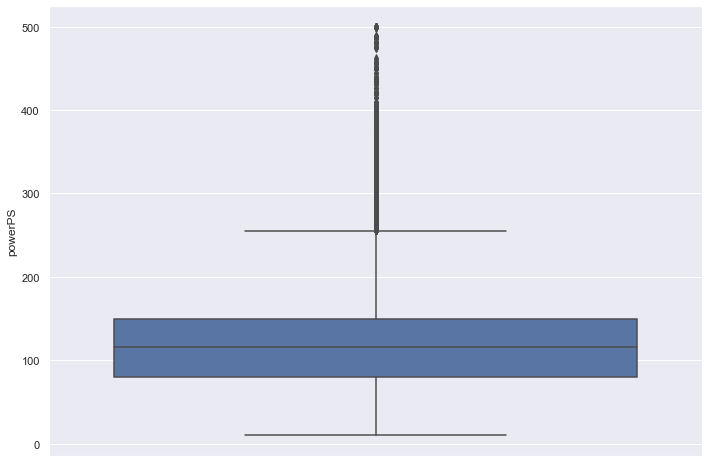

In [49]:
#powerPS
sns.boxplot(y=cars['powerPS'])

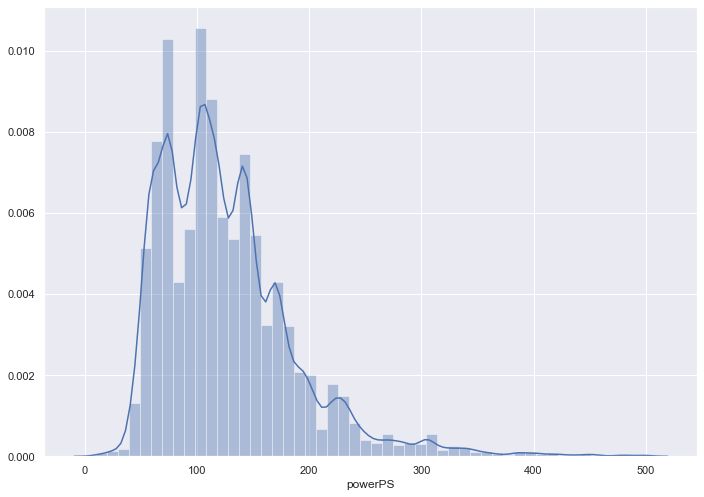

In [50]:
sns.distplot(cars['powerPS'])

# Visualizing parameters after narrowing working range


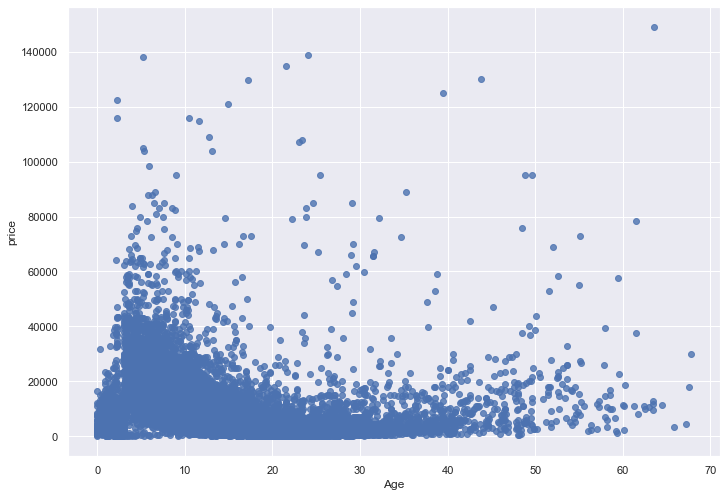

In [53]:
# Age vs price
sns.regplot(x='Age', y='price', scatter=True, fit_reg=False, data=cars)
#cars priced higher are newer
# With increase in age, price decreases
# However some cars are priced higher with inrease in age

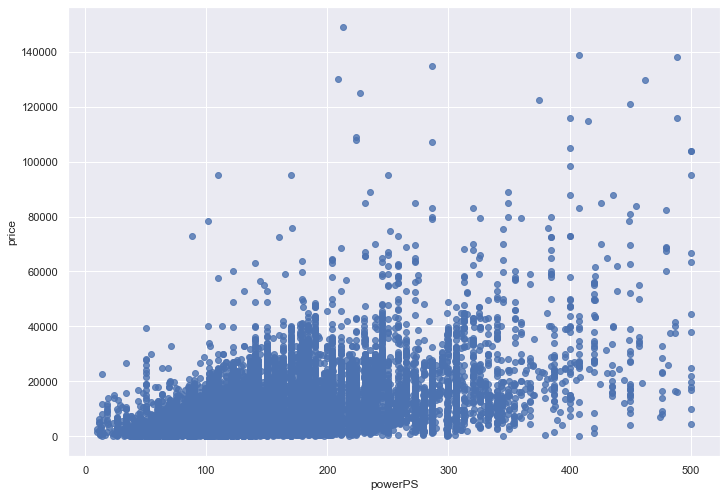

In [54]:
# powerPS vs price
sns.regplot(x='powerPS', y='price', scatter=True, fit_reg=False, data=cars)


In [55]:
# Variable seller
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [56]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


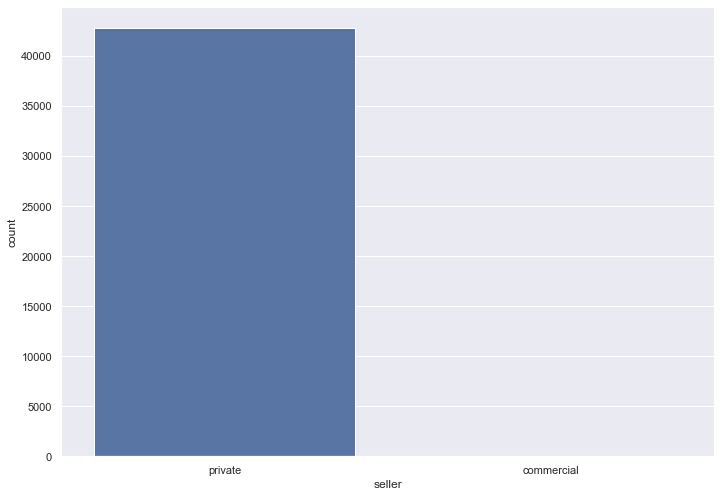

In [58]:
sns.countplot(x='seller',data=cars)
              # Fewer cars have 'commercial' => Insignificant)

In [59]:
# VARIABLE offerType
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

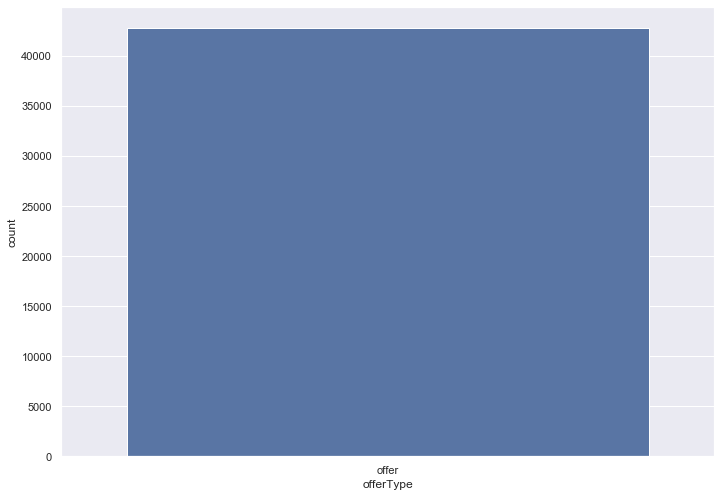

In [60]:
sns.countplot(x='offerType',data=cars)
# All cars have 'offer' => Insignificant

In [61]:
# Variable abtest
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [64]:
pd.crosstab(cars['abtest'], columns='count', normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


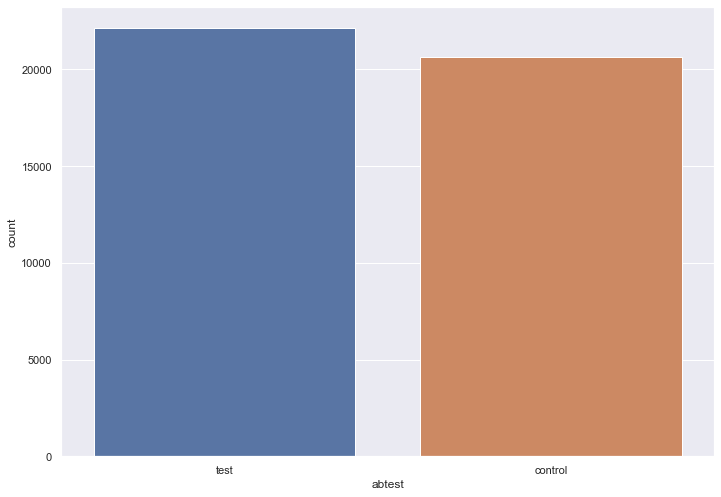

In [67]:
sns.countplot(x ='abtest', data=cars)
# Equally distributed


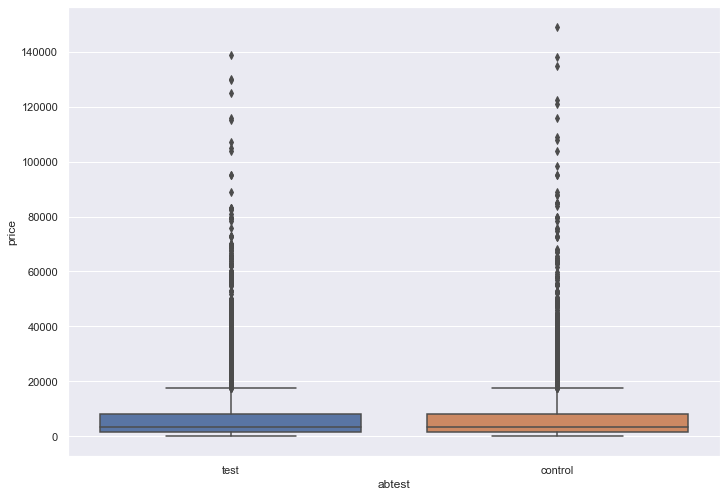

In [68]:
sns.boxplot(x ='abtest', y='price', data=cars)
# For every price value there is almost 50-50 distribution
# Does not affect price => Insignificant

In [69]:
# Variable vehicleType
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [70]:
pd.crosstab(cars['vehicleType'], columns='count', normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


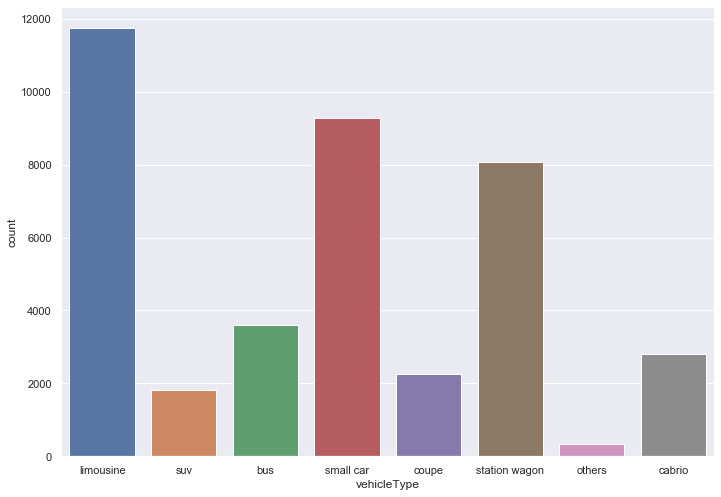

In [71]:
sns.countplot(x ='vehicleType', data=cars)

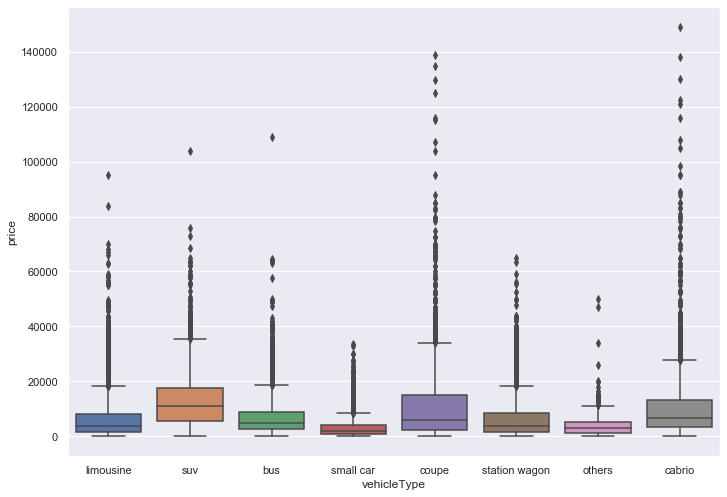

In [72]:
sns.boxplot(x ='vehicleType', y='price', data=cars)
# 8 types= limousine, small cars and station wagons max freq.
# vehicleType affects price

In [74]:
# VARIABLE GEARBOX
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [75]:
pd.crosstab(cars['gearbox'], columns='count', normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


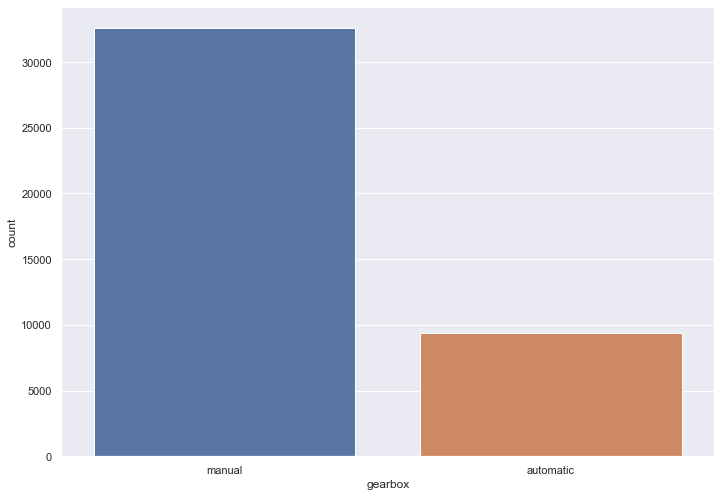

In [76]:
sns.countplot(x ='gearbox', data=cars)

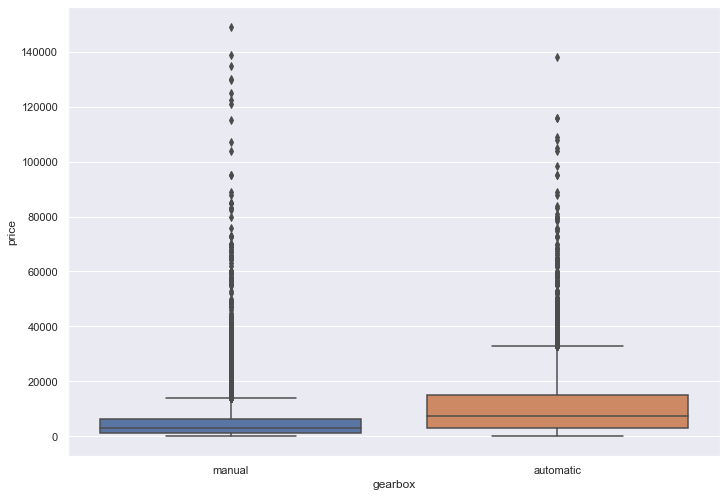

In [77]:
sns.boxplot(x ='gearbox', y='price', data=cars)
# gearbox affects price

In [78]:
# Variable model
cars['model'].value_counts()

golf                  3478
others                2900
3er                   2482
polo                  1500
corsa                 1386
astra                 1276
a4                    1230
passat                1200
c_klasse              1042
5er                   1013
e_klasse               907
a3                     826
a6                     737
focus                  701
fiesta                 637
transporter            630
2_reihe                603
fortwo                 532
1er                    527
a_klasse               497
vectra                 491
twingo                 479
clio                   437
3_reihe                437
touran                 422
mondeo                 388
punto                  363
ibiza                  354
megane                 340
zafira                 325
                      ... 
v60                     10
antara                  10
nubira                   9
900                      9
r19                      8
range_rover              8
c

In [79]:
pd.crosstab(cars['model'], columns='count', normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
1_reihe,0.004
1er,0.013
200,0.000
2_reihe,0.015


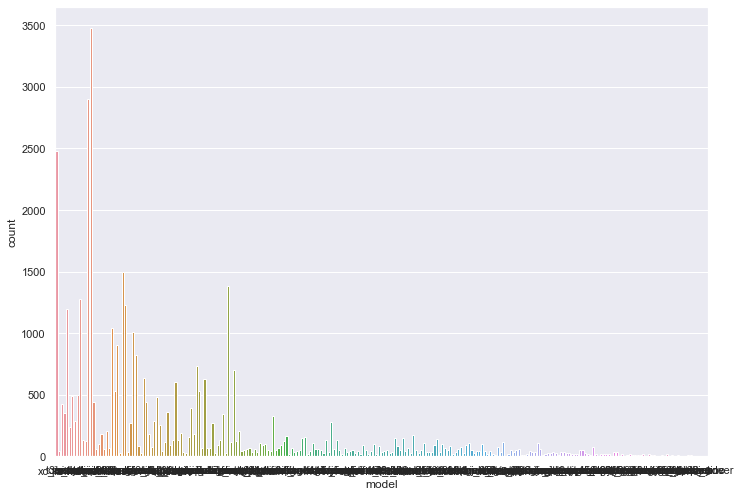

In [80]:
sns.countplot(x ='model', data=cars)

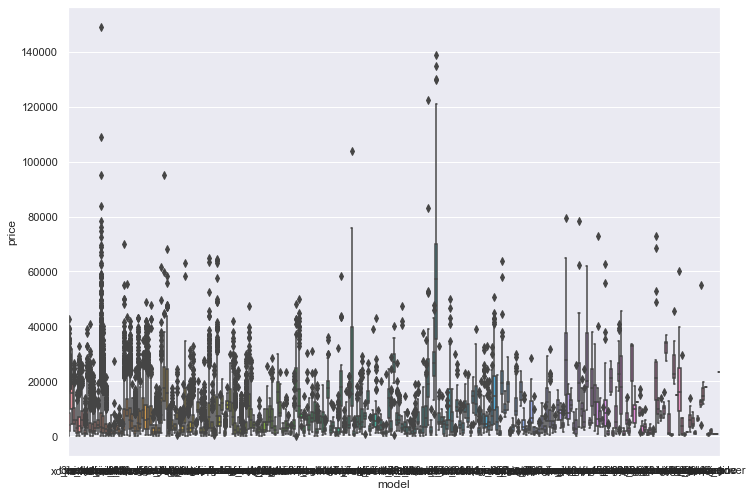

In [81]:
sns.boxplot(x ='model', y='price', data=cars)
# Cars are distributed over many models
# Considered in modelling

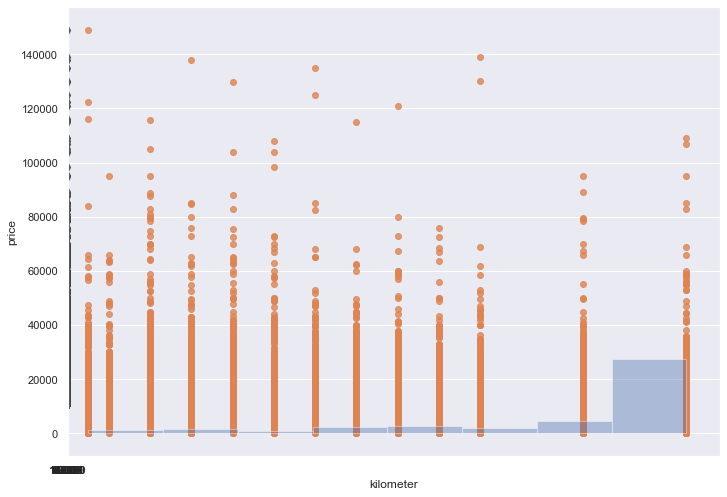

In [82]:
# Variable Kilometer
cars['kilometer'].value_counts()
pd.crosstab(cars['kilometer'], columns='count', normalize=True)
sns.countplot(x ='kilometer', data=cars)
sns.boxplot(x ='kilometer', y='price', data=cars)
sns.distplot(cars['kilometer'],bins=8,kde=False)
sns.regplot(x='kilometer',y='price',scatter=True,fit_reg=False, data=cars)
#Considered in modelling

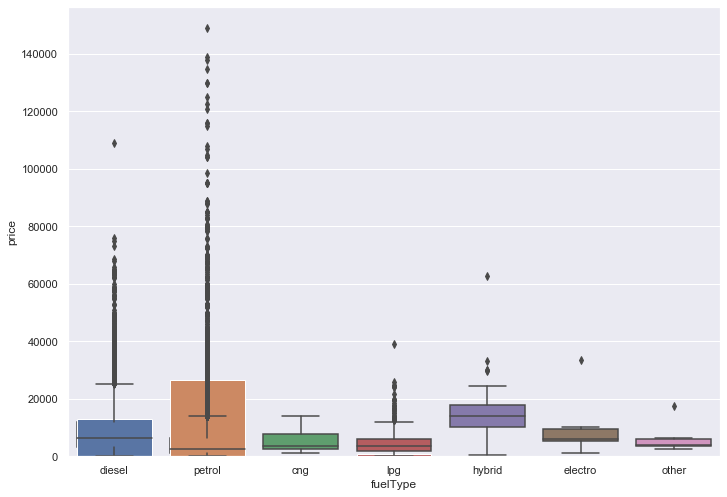

In [83]:
# Variable fuelType
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'], columns='count', normalize=True)
sns.countplot(x ='fuelType', data=cars)
sns.boxplot(x ='fuelType', y='price', data=cars)
# Affects price

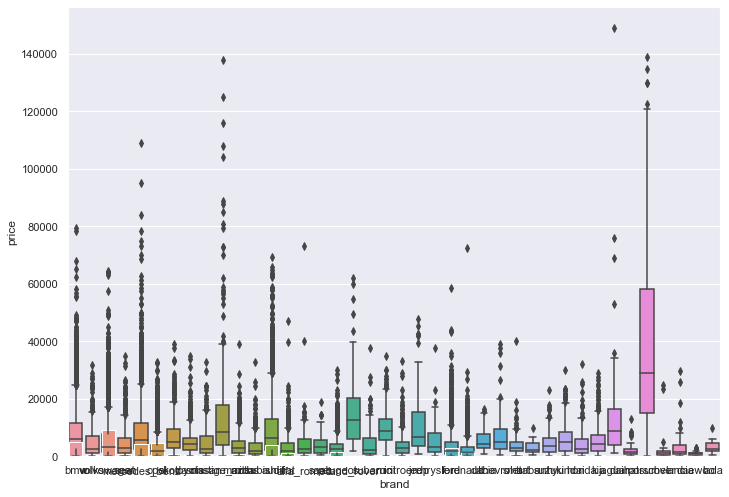

In [84]:
# Variable brand
cars['brand'].value_counts()
pd.crosstab(cars['brand'], columns='count', normalize=True)
sns.countplot(x ='brand', data=cars)
sns.boxplot(x ='brand', y='price', data=cars)
# Affects price

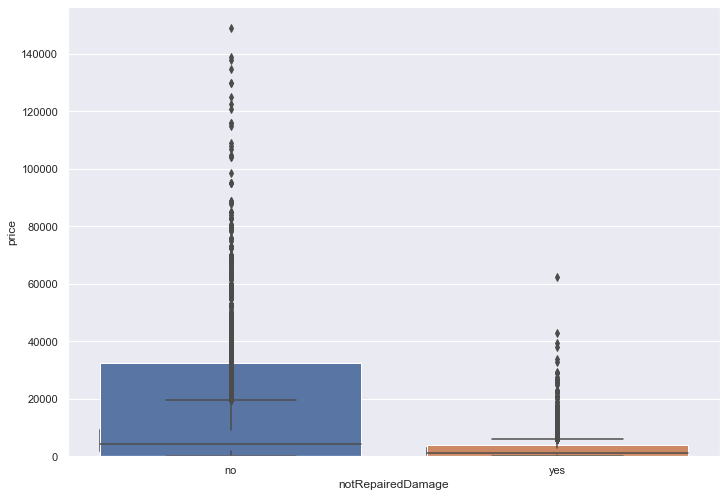

In [85]:
# Variable notRepairedDamege
cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'], columns='count', normalize=True)
sns.countplot(x ='notRepairedDamage', data=cars)
sns.boxplot(x ='notRepairedDamage', y='price', data=cars)
# Considered for modeliing

# REMOVING INSIGNIFICANT VARIABLES

In [86]:
col = ['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy = cars.copy()

In [87]:
# Correlation
cars_select1 = cars.select_dtypes(exclude=[object])
correlation = cars_select1.corr()
round(correlation,3)
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending = False)[1::]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64


We are going to build a Linear Regression and Random Forst model on the two sets of data.
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values


# Omitting missing values 

In [89]:
cars_omit = cars.dropna(axis=0)

In [90]:
# Converting categorical variables to dummy variables
cars_omit = pd.get_dummies(cars_omit, drop_first=True)

In [91]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

<h2> Model building with omitted data

In [92]:
#Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1  = cars_omit['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D3645E208>,
      dtype=object)

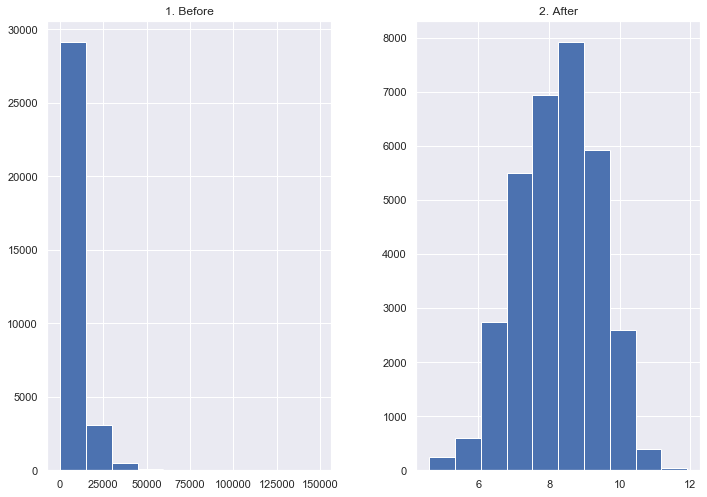

In [93]:
#Plotting the variable price
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

In [94]:
# Transforming price as a logarithmic value
y1 = np.log(y1)

In [95]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


# BASELINE MODEL FOR OMITTED DATA


We are making a base model by using test data mean value.
This is to set a benchmark and to compare with our regression model.


In [97]:
# Finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653337


In [98]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [99]:
# Finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)

1.1274483657478247


# LINEAR REGRESSION WITH OMITTED DATA

In [100]:
# Setting intercept as True
lgr = LinearRegression(fit_intercept=True)

In [101]:
#Model
model_lin1 = lgr.fit(X_train, y_train)

In [104]:
# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

In [105]:
# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513824


In [107]:
# R squared Value
r2_lin_test1 = model_lin1.score(X_test,y_test)
r2_lin_train1 = model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649258 0.7800936978183914


count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

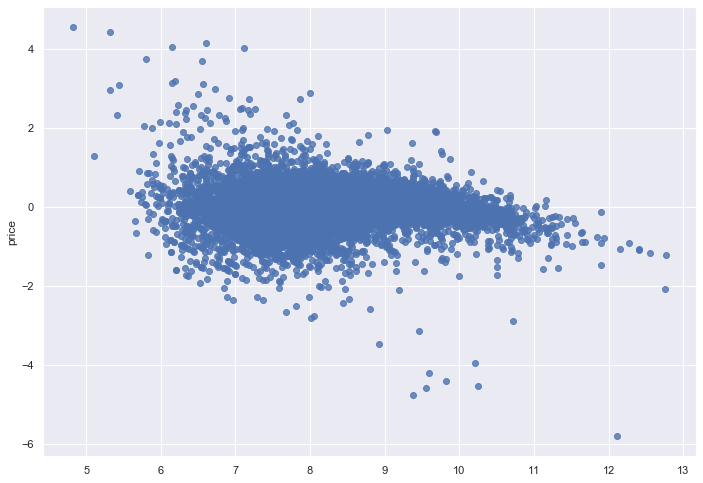

In [109]:
# regression diagnostics- Residual plot analysis
residuals1 = y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, fit_reg=False)
residuals1.describe()

# RANDOM FOREST WITH OMITTED DATA

In [111]:
# Model parameters
rf = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=100,
                          min_samples_split=10,min_samples_leaf=4,random_state=1)

In [112]:
#Model
model_rf1 = rf.fit(X_train,y_train)

In [113]:
# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)

In [114]:
# Computing RMSE  and MSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


In [115]:
# R squared value
r2_rf_test1 = model_rf1.score(X_test, y_test)
r2_rf_train1 = model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)

0.8504018147750623 0.9202494705146291


# MODEL BUILDING WITH IMPUTED DATA

In [116]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) if x.dtype=='float' else x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [117]:
# Convering categorical variables to dummy variables
cars_imputed = pd.get_dummies(cars_imputed, drop_first=True)

In [118]:
#Separating input and output feature
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D23B824E0>,
      dtype=object)

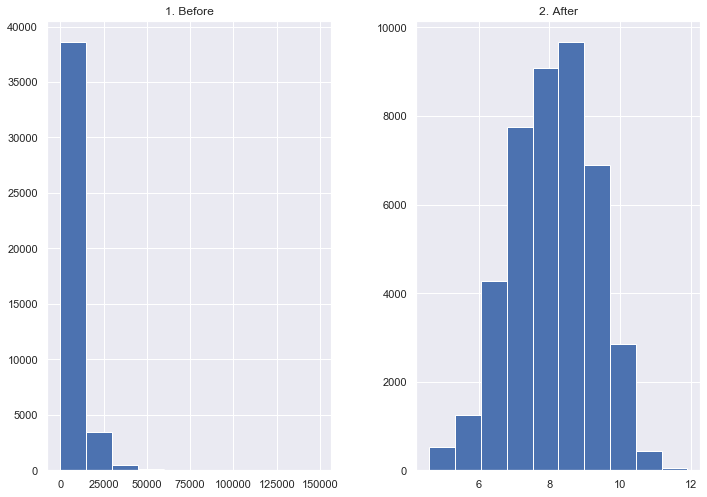

In [119]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

In [120]:
# Transforming price as a log value
y2 = np.log(y2)

In [121]:
# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2,y2, test_size=0.3, random_state=3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)



We are making a base model by using test data mean value.
This is to set a benchmark and to compare with our regression model.


In [123]:
# Finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519193


In [124]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))

In [125]:
# Finding the RMSE
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
print(base_root_mean_square_error_imputed)

1.1884349112889792


# Linear Regression With Imputed Data

In [126]:
# Setting intercept as True
lgr2 = LinearRegression(fit_intercept=True)

In [127]:
#Model
model_lin2 = lgr2.fit(X_train1, y_train1)

In [129]:
# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)

In [130]:
# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.6483956449231307


In [131]:
# R squared Value
r2_lin_test2 = model_lin2.score(X_test1,y_test1)
r2_lin_train2 = model_lin2.score(X_train1,y_train1)
print(r2_lin_test2, r2_lin_train2)

0.7023339008631174 0.7071658736894363


# Random forest with Imputed data

In [132]:
# Model parameters
rf2 = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=100,
                          min_samples_split=10,min_samples_leaf=4,random_state=1)


In [133]:
#Model
model_rf2 = rf2.fit(X_train1,y_train1)

In [134]:
# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)

In [135]:
# Computing RMSE  and MSE
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.494313994408829


In [136]:
# R squared value
r2_rf_test2 = model_rf2.score(X_test1, y_test1)
r2_rf_train2 = model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)

0.8269964521311131 0.9024289431669166


Random Forest Model is better.

<h1><b><i> DONE !!!